In [1]:
#Mounting drive to upload dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [2]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set(style = 'white')

# Input data files are available in the "../churn_prediction" directory.

import os
print(os.listdir("/content/drive/MyDrive/Churn_Prediction_Project"))

# Any results we write to the current directory are saved as output.

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [3]:
# loading dataset using pandas
df = pd.read_csv('/content/drive/MyDrive/Churn_Prediction_Project/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# printing Shape of dataframe
df.shape

(7043, 21)

## Metadata info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

# Passed a dictionary to astype() function
df = df.astype({"customerID":'category',
                "gender":'category',
                "SeniorCitizen":'category',
                "Partner":'category',
                "Dependents":'category',
                "tenure":'float64',
                "PhoneService":'category',
                "MultipleLines":'category',
                "InternetService":'category',
                "OnlineSecurity":'category',
                "OnlineBackup":'category',
                "DeviceProtection":'category',
                "TechSupport":'category',
                "StreamingTV":'category',
                "StreamingMovies":'category',
                "Contract":'category',
                "PaperlessBilling":'category',
                "PaymentMethod":'category',
                "MonthlyCharges": 'float64',
                #"TotalCharges": 'float64'
               })

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

<h4>Target Variable:<br><br>
    Churn: Indicates if the customer has churned (Yes or No)
</h4>
<h4>Numerical Attributes:<br><br>
    1. MonthlyCharges: The monthly fee billed to the customer<br><br>
    2. TotalCharges: The cumulative amount billed to the customer<br>
</h4>
<h4>Categorical Attributes:
    1. customerID: A unique identifier for each customer<br><br>
    2. gender: The customer's gender (male or female)<br><br>
    3. SeniorCitizen: Indicates if the customer is a senior citizen (1, 0)<br><br>
    4. Partner: Indicates if the customer has a partner (Yes, No)<br><br>
    5. Dependents: Indicates if the customer has dependents (Yes, No)<br><br>
    6. Tenure: The duration in months that the customer has been with the company<br><br>
    7. PhoneService: Indicates if the customer has phone service (Yes, No)<br><br>
    8. MultipleLines: Indicates if the customer has multiple telephone lines (Yes, No, No phone service)<br><br>
    9. InternetService: The type of internet service the customer subscribes to (DSL, Fiber optic, No)<br><br>
    10. OnlineSecurity: Indicates if the customer has online security services (Yes, No, No internet service)<br><br>
    11. OnlineBackup: Indicates if the customer uses online backup services (Yes, No, No internet service)<br><br>
    12. DeviceProtection: Indicates if the customer's devices are insured (Yes, No, No internet service)<br><br>
    13. TechSupport: Indicates if the customer has technical support (Yes, No, No internet service)<br><br>
    14. StreamingTV: Indicates if the customer subscribes to streaming TV services (Yes, No, No internet service)<br><br>
    15. StreamingMovies: Indicates if the customer subscribes to streaming movies services (Yes, No, No internet service)<br><br>
    16. Contract: The type of customer contract (Month-to-month, One year, Two year)<br><br>
    17. PaperlessBilling: Indicates if the customer uses paperless billing (Yes, No)<br><br>
    18. PaymentMethod: The methods by which the customer makes payments (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
</h4>








## Handling  Null values

In [8]:
# Checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Percentage of missing values
df.isnull().sum() * 100 / len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

After reviewing the provided output, it is evident that there are 11 missing values, constituting only 0.15% of the total values for the "Total Charges" variable in our dataset. Therefore, we can employ simple mean imputation to fill these missing values.

In [10]:
# imputing missing values with mean of TotalCharges column
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace=True)

## Exploratory Data Analysis of Telecom churn data

### Checking for class imbalance in data

<h4>Our objective is to determine whether a client departed from the company in the prior month, which presents a binary classification challenge due to a somewhat uneven distribution of the target variable:
<br><br>
<li> Churn: No - 72.4% </li><br>
<li> Churn: Yes - 27.6% </li>
</h4>

In [11]:
#  Analysing Class Distribution
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

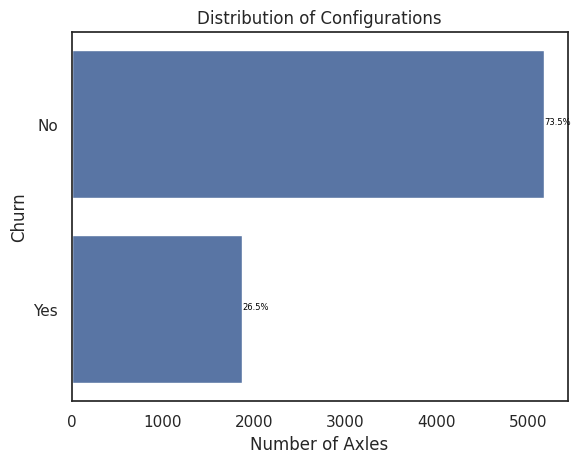

In [12]:
# Define the bar_plot function
def bar_plot(df, column):
    # Create a bar plot using seaborn's countplot function
    ax = sns.countplot(y=column, data=df)

    # Set plot title and x-axis label
    plt.title('Distribution of Configurations')
    plt.xlabel('Number of Axles')

    # Calculate the total number of data points
    total = len(df[column])

    # Add percentage labels to each bar
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), size=6, color='black')

    # Add percentage labels to each box
    for i, box in enumerate(ax.artists):
        height = box.get_height()
        ax.text(i-0.1, height*0.5, '{:.1f}%'.format(height/total*100), ha='center', size=10, color='black')
    # Display the plot
    plt.show()

# Call the bar_plot function on the DataFrame and Churn Column
bar_plot(df, "Churn")

# **Numeric Attributes**
The dataset comprises solely three numerical columns: tenure, monthly charges, and total charges.

Based on the depicted plots, we can derive the following conclusions:

*   Recent users exhibit a higher likelihood of churning.
*   Users with elevated MonthlyCharges demonstrate a heightened tendency to churn.
* TotalCharges display a similar behavior for both categories.  










####  Plotting Histogram

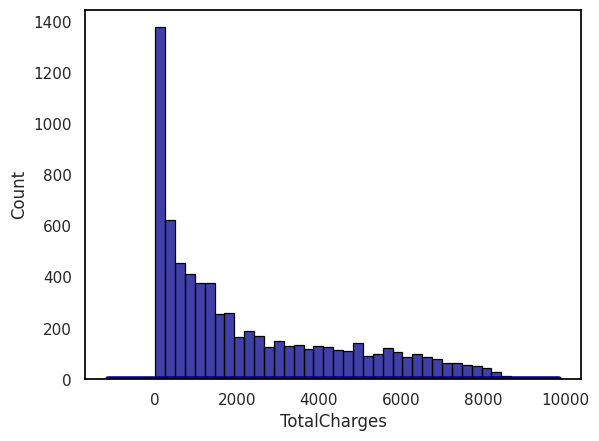

In [13]:
# Plot a density plot and histogram of  arrival delays
sns.histplot(df['TotalCharges'], bins=int(180/5), color='darkblue',
             kde=False, edgecolor='black')

sns.kdeplot(df['TotalCharges'], color='darkblue', linewidth=4, ax=plt.gca())

# Increase outer border size of plot
plt.rcParams['axes.linewidth'] = 2.0
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['top'].set_color('black')

# Display the plot
plt.show()

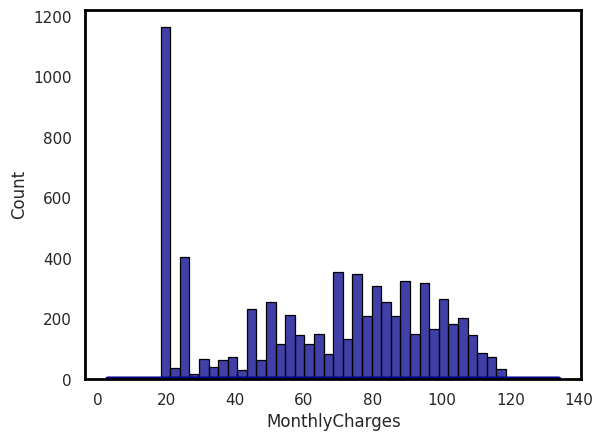

In [14]:
# Plot a density plot and histogram of  arrival delays
sns.histplot(df['MonthlyCharges'], bins=int(180/5), color='darkblue',
             kde=False, edgecolor='black')

sns.kdeplot(df['MonthlyCharges'], color='darkblue', linewidth=4, ax=plt.gca())

# Increase outer border size of plot
plt.rcParams['axes.linewidth'] = 2.0
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['top'].set_color('black')

# Display the plot
plt.show()

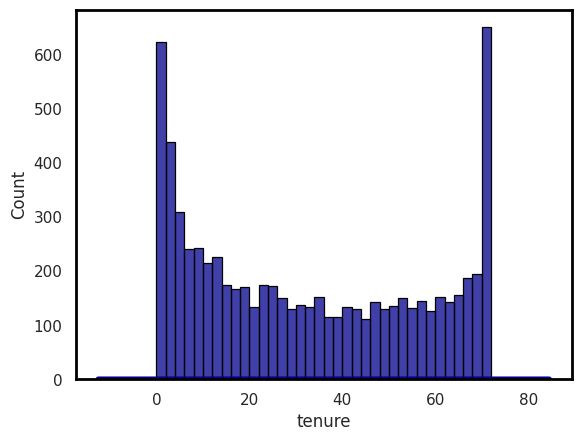

In [15]:
# Plot a density plot and histogram of  arrival delays
sns.histplot(df['tenure'], bins=int(180/5), color='darkblue',
             kde=False, edgecolor='black')

sns.kdeplot(df['tenure'], color='darkblue', linewidth=4, ax=plt.gca())

# Increase outer border size of plot
plt.rcParams['axes.linewidth'] = 2.0
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['top'].set_color('black')

# Display the plot
plt.show()

####  Generating Pairplot

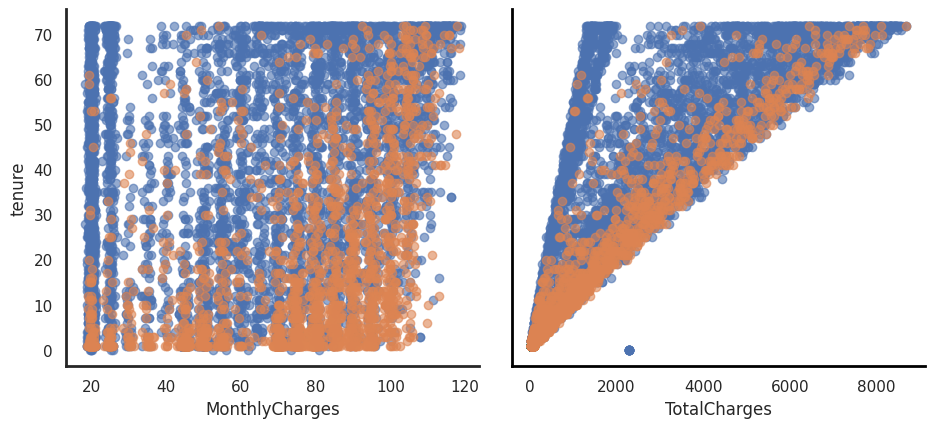

In [16]:
# Create a PairGrid object with the MonthlyCharges and TotalCharges
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.4, hue="Churn", aspect=1.1)

# Add scatterplots to the PairGrid object
ax = g.map(plt.scatter, alpha=0.6)

# Increase outer border size of plot
plt.rcParams['axes.linewidth'] = 2.0
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['top'].set_color('black')

# Display the plot
plt.show()

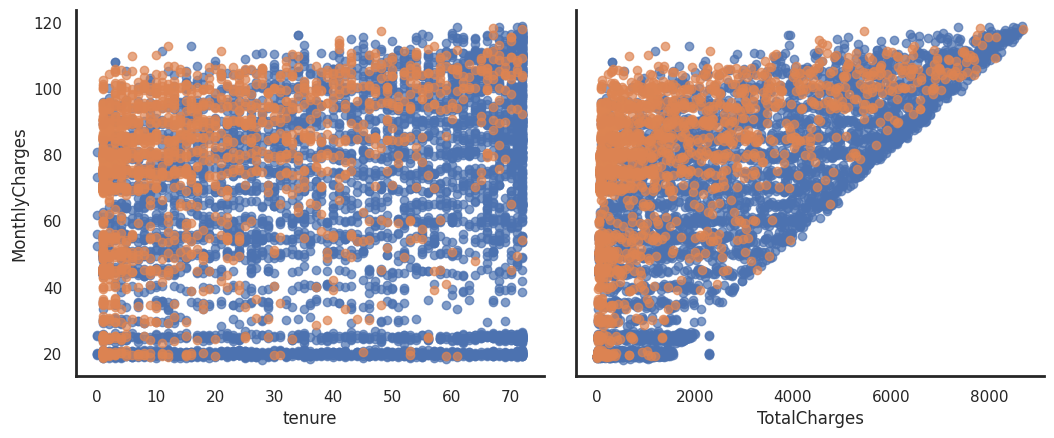

In [17]:
# Create a PairGrid object with the MonthlyCharges vs TotalCharges and tenure variables
g = sns.PairGrid(df, y_vars=["MonthlyCharges"], x_vars=["tenure", "TotalCharges"], height=4.5, hue="Churn", aspect=1.2)
ax = g.map(plt.scatter, alpha=0.7)

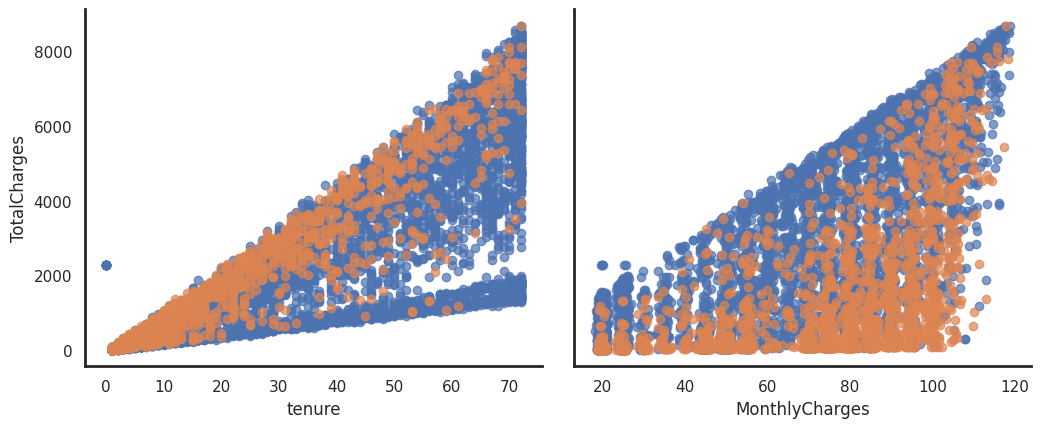

In [18]:
# Create a PairGrid object with the TotalCharges vs MonthlyCharges and tenure variables
g = sns.PairGrid(df, y_vars=["TotalCharges"], x_vars=["tenure", "MonthlyCharges"], height=4.4, hue="Churn", aspect=1.2)
ax = g.map(plt.scatter, alpha=0.7)

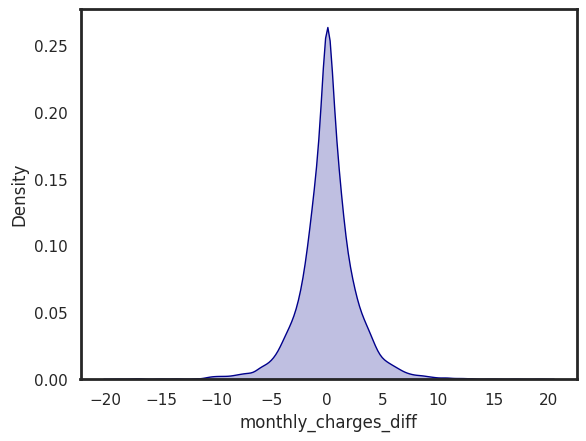

In [19]:
# Calculate new features
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure'] # Calculate the ratio of total charges to tenure
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio'] # Calculate the difference between monthly charges and the ratio

# Create a KDE plot of the 'monthly_charges_diff' column
sns.kdeplot(data=df, x='monthly_charges_diff', fill=True, color='darkblue', legend=False)

# Save the figure with a custom filename
plt.savefig('kde_plot_monthly_charges_diff.png')


### **Categorical Attributes in Telecom Data**
This dataset comprises 16 categorical features:




*  Six binary features with options of Yes or No.
*  Nine features with three distinct values each, representing different categories.

* One feature with four unique values, providing additional categorical information.









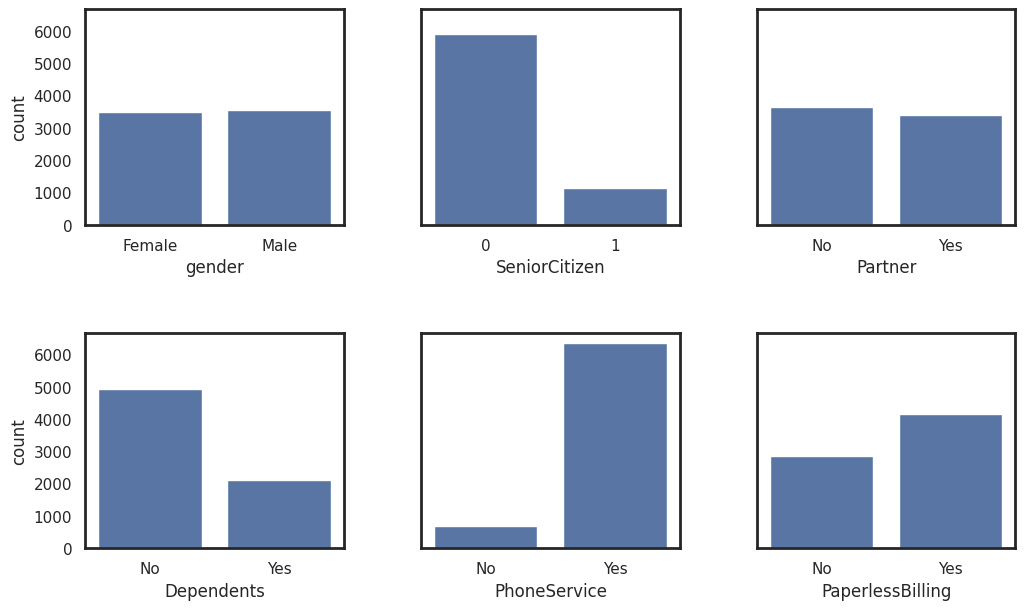

In [20]:
# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True, gridspec_kw={'wspace':0.3, 'hspace':0.5} )

# Create count plots for each variable
sns.countplot(data=df, x="gender", ax=axes[0,0])
sns.countplot(data=df, x="SeniorCitizen", ax=axes[0,1])
sns.countplot(data=df, x="Partner", ax=axes[0,2])
sns.countplot(data=df, x="Dependents", ax=axes[1,0])
sns.countplot(data=df, x="PhoneService", ax=axes[1,1])
sns.countplot(data=df, x="PaperlessBilling", ax=axes[1,2])
# Save the figure with a count_plots filename
fig.savefig("count_plots.png")

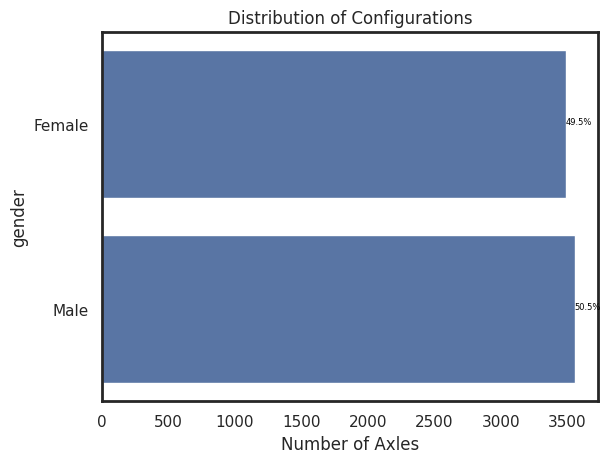

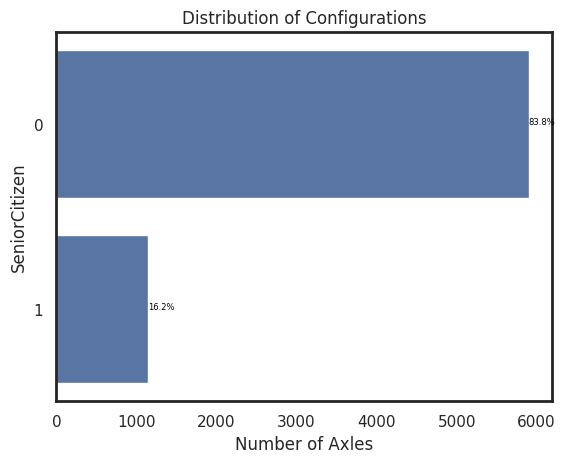

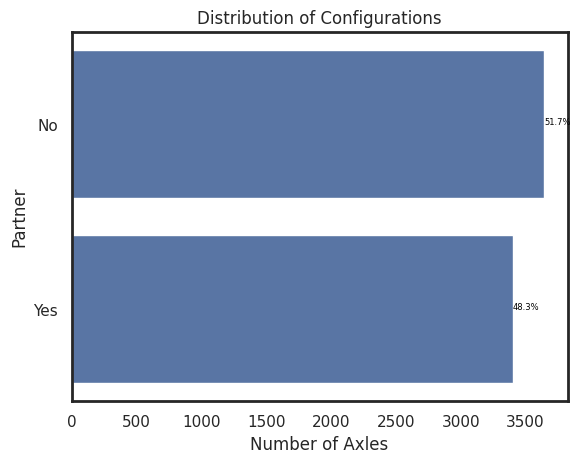

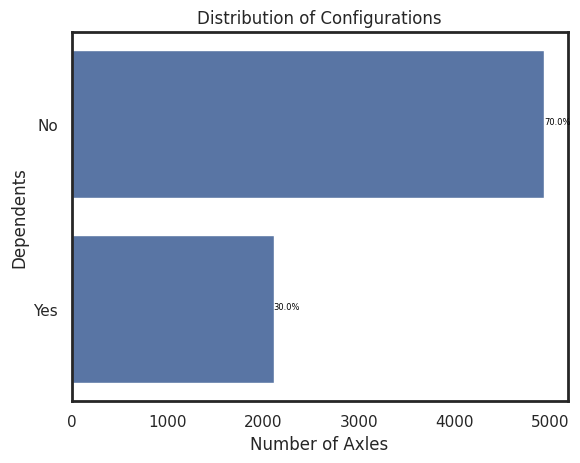

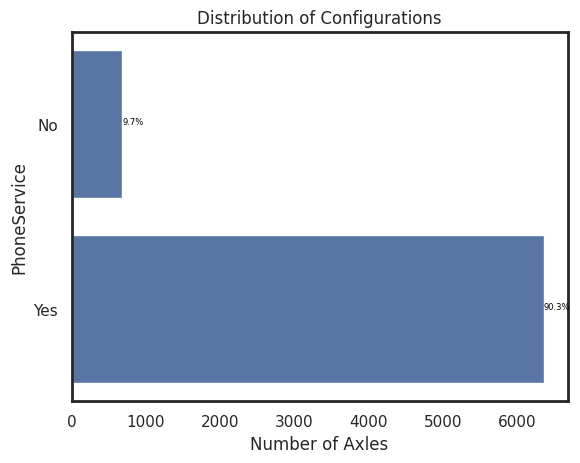

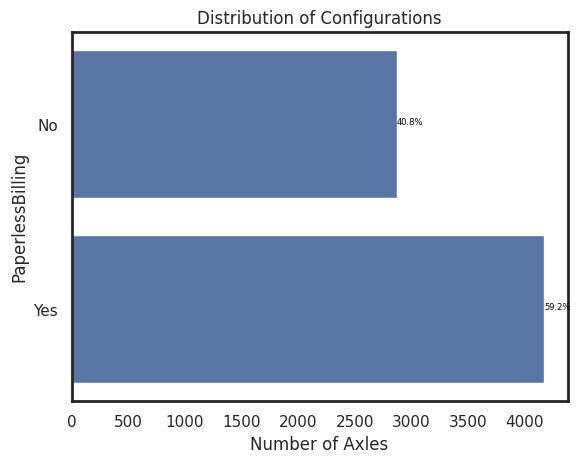

In [21]:
# Call the bar_plot function on the DataFrame and  each categorical column
bar_plot(df, "gender")
bar_plot(df, "SeniorCitizen")
bar_plot(df, "Partner")
bar_plot(df, "Dependents")
bar_plot(df, "PhoneService")
bar_plot(df, "PaperlessBilling")

### Partner and Dependents Plot

<Axes: xlabel='Partner', ylabel='count'>

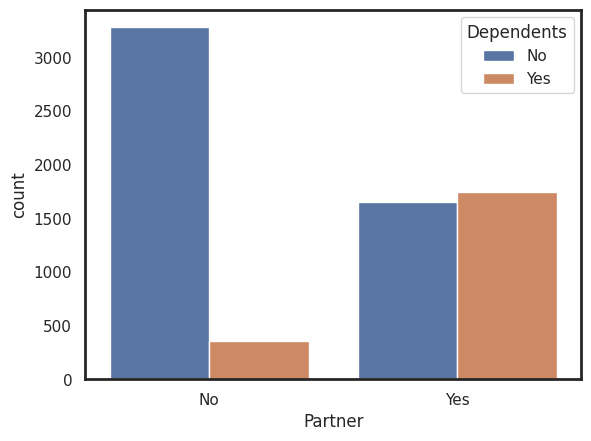

In [22]:
sns.countplot(x="Partner", data=df, hue = 'Dependents')

<Axes: xlabel='SeniorCitizen', ylabel='count'>

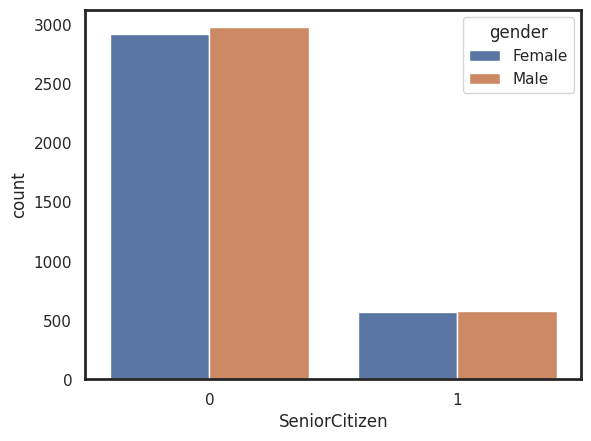

In [23]:
sns.countplot(x="SeniorCitizen", data=df, hue = 'gender')

### Senior Citizen and Dependent

<Axes: xlabel='SeniorCitizen', ylabel='count'>

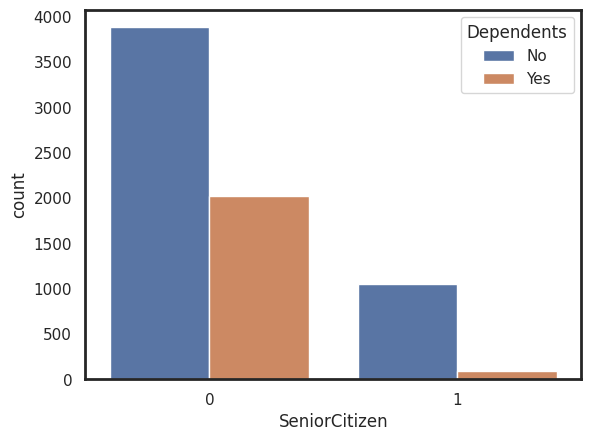

In [24]:
sns.countplot(x="SeniorCitizen", data=df, hue = 'Dependents')


### Phone and Internet services Analysis

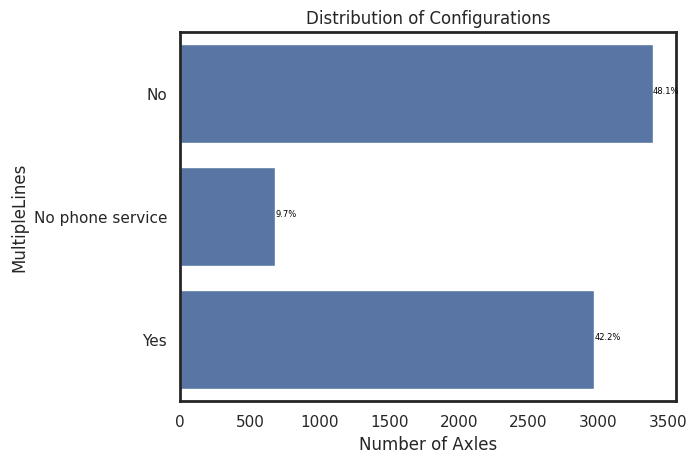

In [25]:
bar_plot(df, "MultipleLines")

<Axes: xlabel='MultipleLines', ylabel='count'>

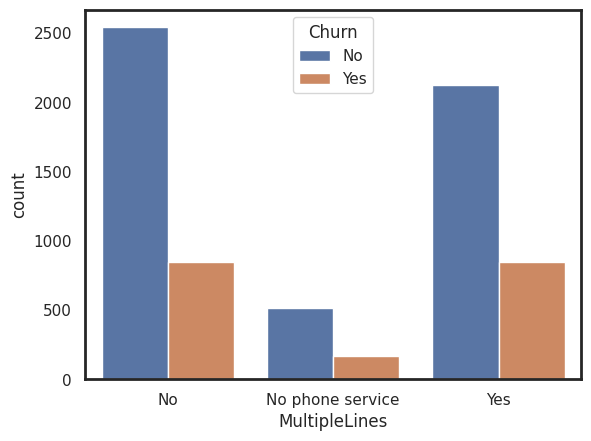

In [26]:
# Countplot of churn among  customers with Multiplelines of phone
sns.countplot(x="MultipleLines", data=df, hue = 'Churn')



*   A small number of customers lack phone service.

*   Customers who subscribe to multiple lines tend to exhibit a marginally higher churn rate.



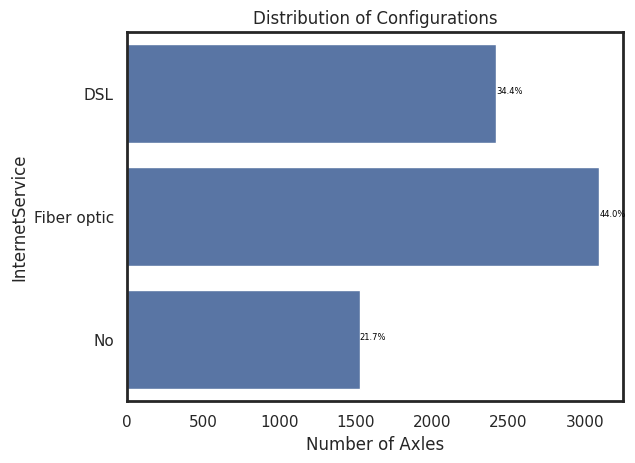

In [27]:
# Plot customers with different InternetService
bar_plot(df, "InternetService")

<Axes: xlabel='InternetService', ylabel='count'>

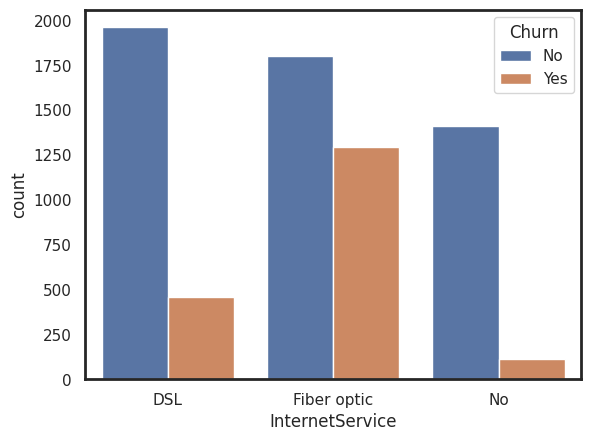

In [28]:
# Counting churn rate among customers with InternetService
sns.countplot(x="InternetService", data=df, hue = 'Churn')



*  
Customers who do not have internet service experience a very minimal churn rate.

* Customers who have a fiber connection are more likely to churn compared to those with a DSL connection.  



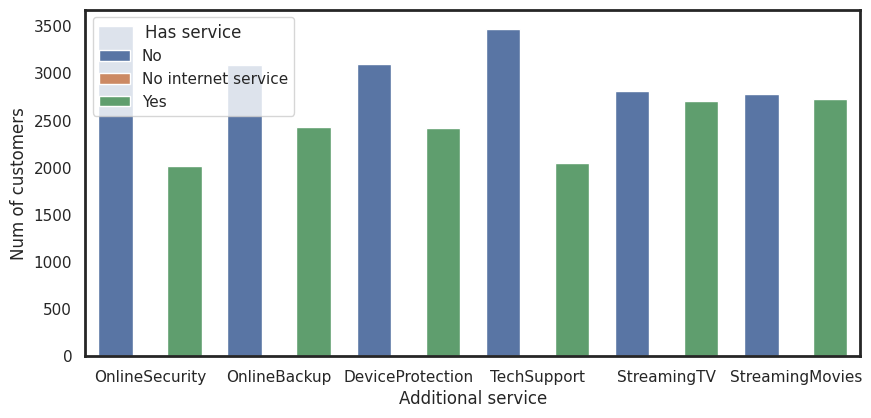

In [29]:
# Define the list of columns to be melted
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

# Filter out the rows with "No" InternetService and melt the dataframe
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)

# Create a figure with a specified size
plt.figure(figsize=(10, 4.5))

# Plot the count of customers for each additional service
ax = sns.countplot(data=df1, x='variable', hue='Has service')

# Set the x and y labels of the plot
ax.set(xlabel='Additional service', ylabel='Num of customers')

# Display the plot
plt.show()

###  Customer distribution based on Payment Method

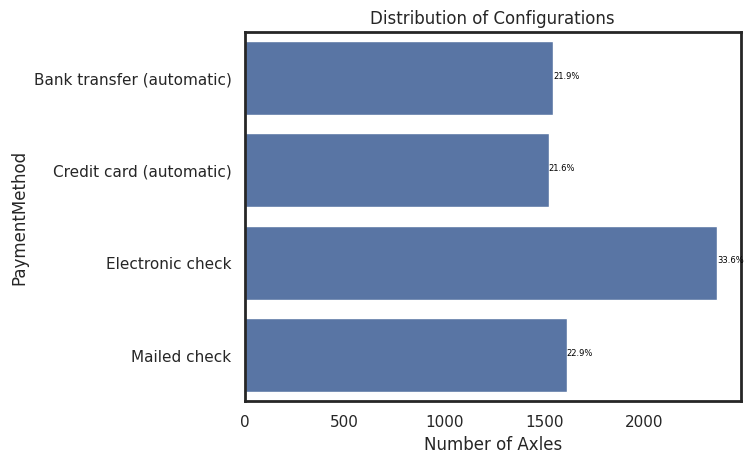

In [30]:
# Bar plot of paymentMethod
bar_plot(df, "PaymentMethod")

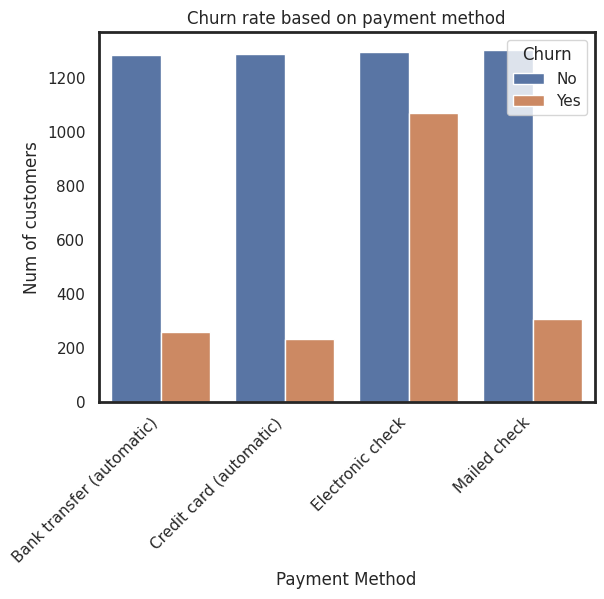

In [31]:
# Countplot of churn rate based on payment method
ax = sns.countplot(x="PaymentMethod", data=df, hue = 'Churn')

# Set the x-axis tick labels to rotate and display vertically
plt.xticks(rotation=45, ha='right')

# Set the title and labels of the plot
plt.title("Churn rate based on payment method")
plt.xlabel("Payment Method")
plt.ylabel("Num of customers")

# Display the plot
plt.show()

In [32]:
# Printing all columns dataframe
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'total_charges_to_tenure_ratio', 'monthly_charges_diff'],
      dtype='object')

## Correlation between features of dataset

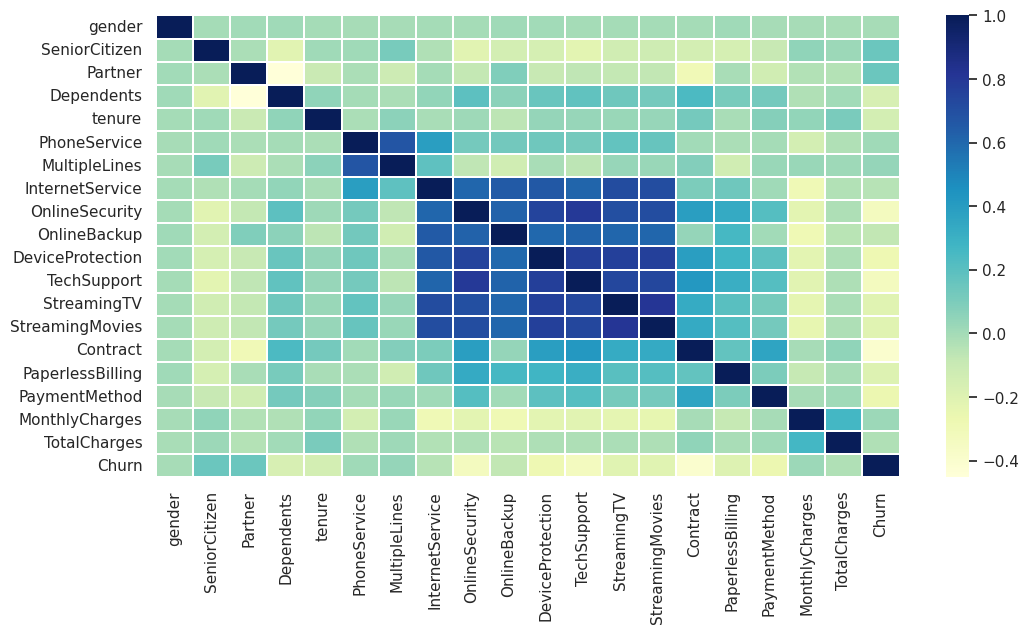

In [36]:
plt.figure(figsize=(12, 6))
df_corr = df.apply(lambda x: pd.factorize(x)[0])
ax = sns.heatmap(df_corr.corr(), xticklabels=df_corr.columns, yticklabels=df_corr.columns,
                 linewidths=.2, cmap="YlGnBu")

<Axes: >

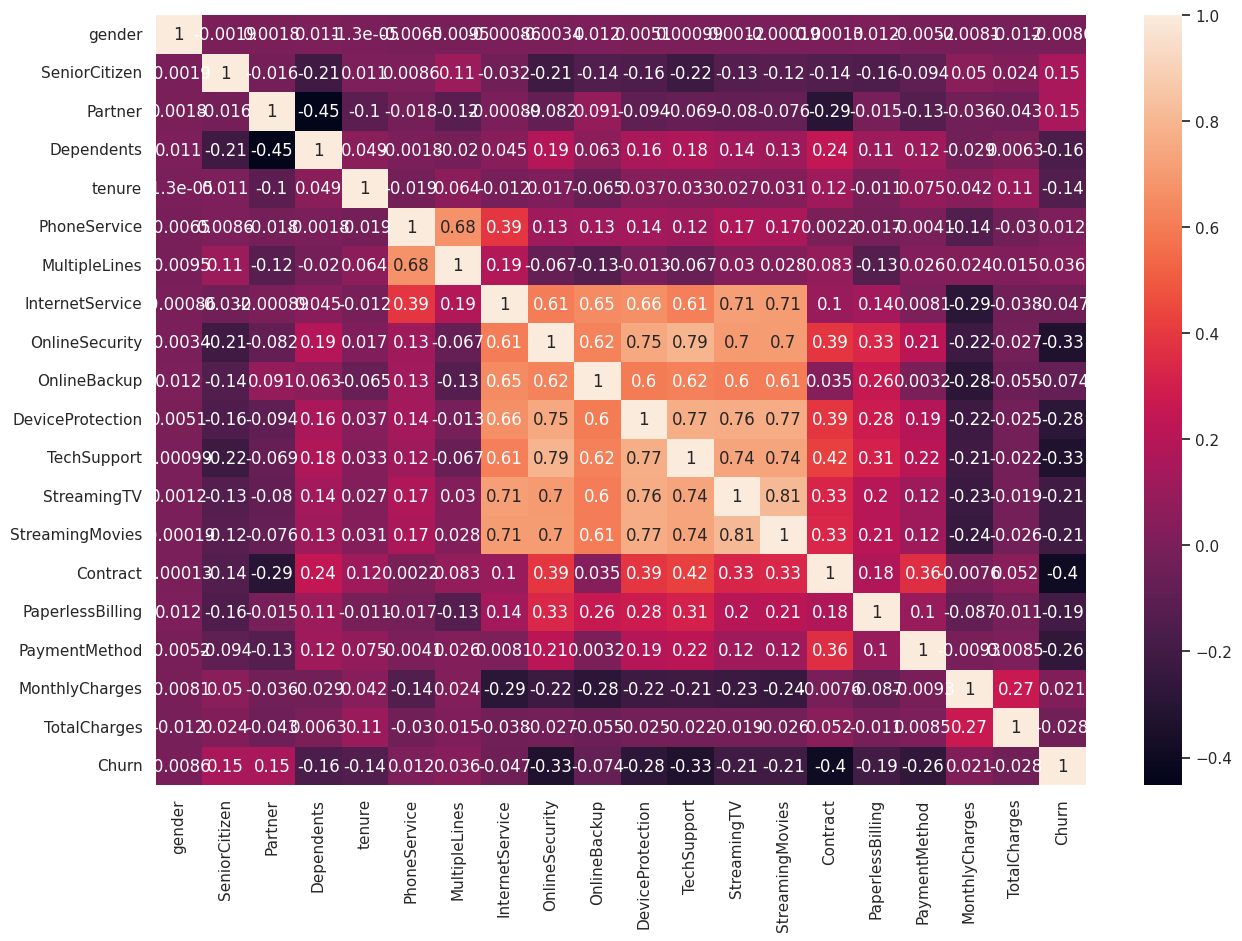

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr.corr(), annot=True)

## Feature Importance Analysis

<ipython-input-40-107dafc32867>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')


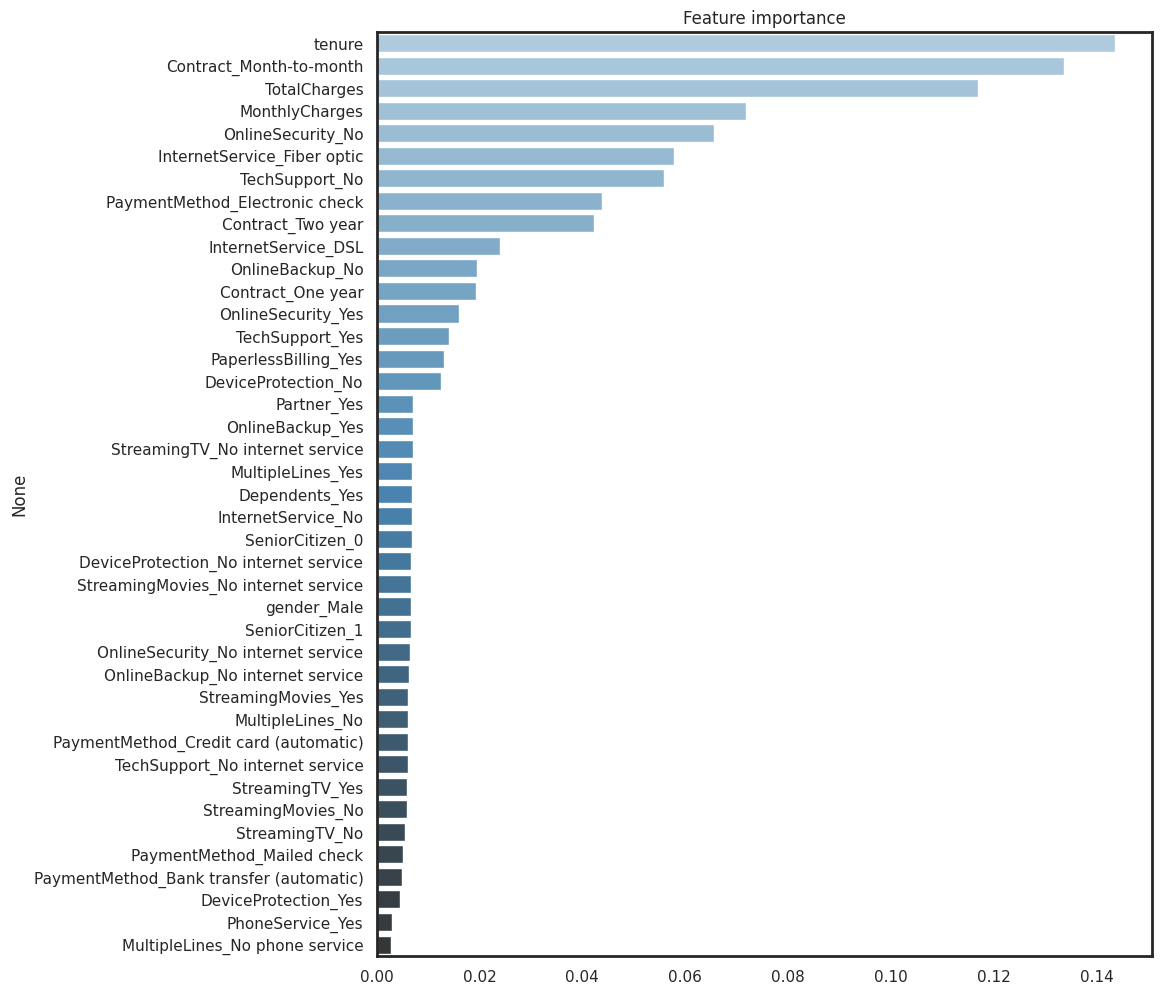

In [40]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encoding
df = pd.get_dummies(df)
# Dropping redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop,axis=1), df['Churn_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plotting  features importance
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

### **Oversampling Technique**
 The Synthetic Minority Oversampling Technique (SMOTE) is a widely used method to address imbalanced datasets by creating synthetic data points for the minority class, thereby oversampling that particular class.

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(x, y)

In [42]:
y_resampled.value_counts()

Churn_Yes
False    5174
True     5174
Name: count, dtype: int64

## Splitting Data into Train and Test
Divides data into Training and Testing Subsets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.15, random_state=42)

In [48]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Create and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=3000)
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Print evaluation metrics
print("Logistic Regression Evaluation Metrics:")
print("Confusion Matrix : \n", confusion_matrix(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("Precision: ", precision_score(y_test, lr_predictions, average=None))
print("Recall: ", recall_score(y_test, lr_predictions, average=None))
print("F1 Score: ", f1_score(y_test, lr_predictions, average=None))

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=0, n_estimators=5000, max_depth=8)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Print evaluation metrics
print("\nRandom Forest Evaluation Metrics:")
print("Confusion Matrix : \n", confusion_matrix(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))
print("Precision: ", precision_score(y_test, rf_predictions, average=None))
print("Recall: ", recall_score(y_test, rf_predictions, average=None))
print("F1 Score: ", f1_score(y_test, rf_predictions, average=None))

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42,learning_rate=0.1, n_estimators=6000, max_depth=10)
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Print evaluation metrics
print("\nGradient Boosting Evaluation Metrics:")
print("Confusion Matrix : \n", confusion_matrix(y_test, gb_predictions))
print("Accuracy: ", accuracy_score(y_test, gb_predictions))
print("Precision: ", precision_score(y_test, gb_predictions, average=None))
print("Recall: ", recall_score(y_test, gb_predictions, average=None))
print("F1 Score: ", f1_score(y_test, gb_predictions, average=None))

# Compare different models
models = [lr_model, rf_model, gb_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    print(f"\n{model_names[i]} Evaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average=None)}")
    print(f"Recall: {recall_score(y_test, y_pred, average=None)}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average=None)}")

Logistic Regression Evaluation Metrics:
Confusion Matrix : 
 [[873 148]
 [166 883]]
Accuracy:  0.8483091787439614
Precision:  [0.84023099 0.85645005]
Recall:  [0.85504407 0.84175405]
F1 Score:  [0.84757282 0.84903846]

Random Forest Evaluation Metrics:
Confusion Matrix : 
 [[839 182]
 [128 921]]
Accuracy:  0.8502415458937198
Precision:  [0.86763185 0.83499547]
Recall:  [0.82174339 0.87797903]
F1 Score:  [0.84406439 0.85594796]

Gradient Boosting Evaluation Metrics:
Confusion Matrix : 
 [[902 119]
 [161 888]]
Accuracy:  0.8647342995169082
Precision:  [0.84854186 0.88182721]
Recall:  [0.8834476 0.8465205]
F1 Score:  [0.86564299 0.86381323]

Logistic Regression Evaluation Metrics:
Accuracy: 0.8483091787439614
Precision: [0.84023099 0.85645005]
Recall: [0.85504407 0.84175405]
F1 Score: [0.84757282 0.84903846]

Random Forest Evaluation Metrics:
Accuracy: 0.8502415458937198
Precision: [0.86763185 0.83499547]
Recall: [0.82174339 0.87797903]
F1 Score: [0.84406439 0.85594796]

Gradient Boosting

### **Models**
To demonstrate the basic model and its predictions, a GradientBoostingClassifier model has been implemented for starters.

In [52]:
# Installing required modules
!pip install scikit-learn

# Importing required modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Models used for classification
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


In [53]:
# Training and evaluating each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

Training Logistic Regression...
Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Gradient Boosting...


In [54]:
    # Evaluation report of model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average=None)
    precision = precision_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)


In [56]:
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    print("=" * 50)



Gradient Boosting Results:
Accuracy: 0.8628019323671497
Recall: [0.86875612 0.85700667]
Precision: [0.85535198 0.87028074]
F1 Score: [0.86200194 0.8635927 ]
Confusion Matrix:
[[887 134]
 [150 899]]
Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.87      0.86      1021
        True       0.87      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [57]:
clf_forest = GradientBoostingClassifier()
clf_forest.fit(X_train, y_train)

GradientBoostingClassifier()

Model performance on training subset

In [58]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8668760570186035

Model performance on testing subset

In [59]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8628019323671497

## Confusion Martrix for Churn prediction

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values of customer churn
actual = y_test
#predicted values of customer churn
predicted = pred_test

# printing confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# printing outcome values
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for Precision, Recall f1-score and Accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[899 150]
 [134 887]]
Outcome values : 
 899 150 134 887
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.86      0.86      1049
           0       0.86      0.87      0.86      1021

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



## Evaluation

In [61]:
y_true = y_test
y_pred = pred_test
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)


array([[887, 134],
       [150, 899]])

In [63]:
# Accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)


0.8628019323671497

In [64]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)


array([0.86875612, 0.85700667])

In [65]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

array([0.85535198, 0.87028074])

In [66]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average=None)

array([0.86200194, 0.8635927 ])